# Introduction :An interpretation of the data with respect to the Movie.
                                                                 
                                         
In this notebook , the titanic dataset is explored with relevance to the perspectives that were been projected in the famous James Cameron movie Titanic based on the tragic story of the RMS Titanic , in the cold Atlantic Ocean. Now , lets not get deep in the story , which might lead us nowhere near to the solution. But if one may question , how the story has thrown light on this dataset , my answer is , the certain facts that were shown in the movie , which will be supported by the graphs as we go through the notebook ,helped me in Feature selection. 



<img src="https://cdn.britannica.com/79/4679-050-BC127236/Titanic.jpg">

***Bon Voyage !!***

# Playing with data :

As the title suggests , I have no experience of how things are in Kaggle , thus the "playing" is sort of a , playing with borrowed toys.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sb

* Loading the datasets

In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* Combining the train and test datasets.

In [4]:
combine = [train,test]

* Checking the error or missing value percentages of each feature.

In [5]:
for c in train.columns:
    print(c, str(100*train[c].isnull().sum()/len(train)))


PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 19.865319865319865
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.10437710437711
Embarked 0.2244668911335578


We see there are missing values in *Age* , *Cabin* and *Embarked* data. As the values of Cabin are in string , we are going to disregard it. According to the movie and common human sentiments , we will use the age values.

In [6]:
train['Age'] = train['Age'].fillna(train['Age'].mean())

Here , I have replaced the missing values of age with the average of all the ages of the people who boarded the Titanic.


In [7]:
for c in train.columns:
    print(c, str(100*train[c].isnull().sum()/len(train)))

PassengerId 0.0
Survived 0.0
Pclass 0.0
Name 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Ticket 0.0
Fare 0.0
Cabin 77.10437710437711
Embarked 0.2244668911335578


Now we can see that there are no missing values in Age column.

* Checking how many people from differnt class and sex had survived.

In [8]:
dependencies_sex = train[['Sex', 'Survived']].groupby(['Sex'],as_index=False).mean()
dependencies_Pclass = train[['Pclass', 'Survived']].groupby(['Pclass'],as_index=False).mean()

print(dependencies_Pclass)
print(dependencies_sex)

   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
      Sex  Survived
0  female  0.742038
1    male  0.188908


The large difference in the numbers shows that these two features - *Pclass* and *Sex* , have influence on the survival of the boarded passengers. 

# Graphs that support my feature selection based on the movie.

* Starting off with the survivor count


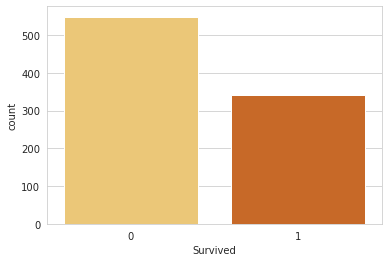

In [9]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',data=train,palette='YlOrBr')


* Survivor Count based on Sex 

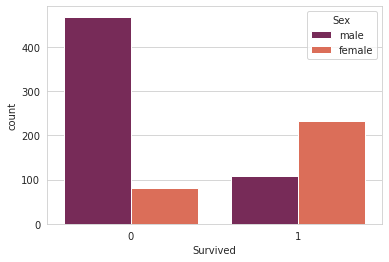

In [10]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Sex',data=train,palette='rocket')


* Survivor Count based on Class of Passenger

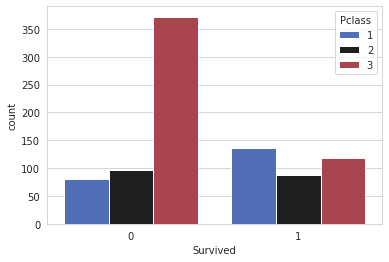

In [11]:
sb.set_style('whitegrid')
sb.countplot(x='Survived',hue='Pclass',data=train,palette='icefire')


* Survival Count based on Age

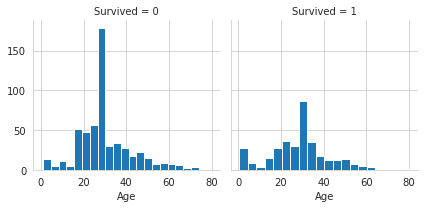

In [12]:
g = sb.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)


* Splitting Titles from Names 

In [13]:
for dats in combine:
    dats['Title'] = dats.Name.str.extract('([A-Za-z]+)\.',expand=False)

* Grouping various Titles under Rare Category.

In [14]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [15]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


* Label Encoding Titles. 

In [16]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


Now we can see that under the Column Title , instead of *Mr.* , *Mrs.* , *Miss* , etc. , there are numbers 1-5 , representing the 5 different Titles.

* Here we see how the survival of the passengers depend on the *Sex* and *Title*. ( There are 2 rows with Title as 5 , which represents the Rare category , and it implies that females of high classes were favoured over all )

In [18]:
title_dependencies=train[['Title','Survived','Sex']].groupby(['Title','Sex'],as_index=False).mean()

title_dependencies

,Title,Sex,Survived
0,1,male,0.156673
1,2,female,0.702703
2,3,female,0.793651
3,4,male,0.575000
4,5,female,1.000000
5,5,male,0.250000


# Selecting the final features !!

<img src="https://64.media.tumblr.com/37e6f5cd93269829406ccb5bbccf34e0/tumblr_pezn7j41oN1qzs7uio4_r1_400.gifv">

According to the movie , the Children and the Women , obviously in the decrasing order of their class , were allowed to board the life boats first. Remember the scene were the crew were shouthing , *" Women and Children First !!"*. Thus the selection of the *Sex* , *Age* and the *Pclass* as a valid feature for the prediction. As we have clearly seen that people of high social stature had a cent percent chance of survival , thus the *Title* column is also a valid feature. 

Now , the *Parch* and *SibSp* feature , which represents parents and children, and siblings and spouse , is also a valid feature , because parents and children were not to be separated , and siblings and spouse too. Thus , those passengers who were travelling alone were left behind. 

The reason behind dropping , *Cabin* , *Embarked* and *Ticket* feature is , that in the data *Ticket* , there are too many mixed data type , and that doesnt help us figure out the survival of the passengers ; in the *Cabin* data , there were too many missing values , although it might have been useful , because the cabin position had an inportant role in the survival as the lower cabins were filled with water first ; the *Embarked* data has nothing to do with the survival , because the port of embarkation did not determine the fate of the passengers, although , upon speculations one may find patterns in the data. 

What we can see is , that the prejudice of people of certain social backgrounds determined the survival of the passengers.  

In [19]:
train = train.drop(['Name', 'PassengerId', 'Cabin', 'Embarked','Ticket'], axis=1)
test = test.drop(['Name', 'PassengerId', 'Cabin', 'Embarked','Ticket'], axis=1)

combine=[train,test]

print(train.head())

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0}).astype(int)

print(train.head())
print (test.head())


   Survived  Pclass     Sex   Age  SibSp  Parch     Fare  Title
0         0       3    male  22.0      1      0   7.2500      1
1         1       1  female  38.0      1      0  71.2833      3
2         1       3  female  26.0      0      0   7.9250      2
3         1       1  female  35.0      1      0  53.1000      3
4         0       3    male  35.0      0      0   8.0500      1
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Title
0         0       3    0  22.0      1      0   7.2500      1
1         1       1    1  38.0      1      0  71.2833      3
2         1       3    1  26.0      0      0   7.9250      2
3         1       1    1  35.0      1      0  53.1000      3
4         0       3    0  35.0      0      0   8.0500      1
   Pclass  Sex   Age  SibSp  Parch     Fare  Title
0       3    0  34.5      0      0   7.8292      1
1       3    1  47.0      1      0   7.0000      3
2       2    0  62.0      0      0   9.6875      1
3       3    0  27.0      0      0   8.6625   

# Splitting Training data 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test , Y_train, Y_test = train_test_split(train.drop(['Survived'],axis=1),train['Survived'],test_size=0.10,random_state=None)

# Applying Logistic Regression :

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [22]:
modelLR= LogisticRegression(solver='liblinear',C=0.21,random_state=1)
modelLR.fit(X_train,Y_train)


LogisticRegression(C=0.21, random_state=1, solver='liblinear')

In [23]:
Y_pred_log=modelLR.predict(X_test)
acc_LR = metrics.accuracy_score(Y_test, Y_pred_log)

In [24]:
print(Y_pred_log)
print("We see that Logistic regression gives an Accuracy of ",acc_LR*100,"% on the traing set.")


[1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1]
We see that Logistic regression gives an Accuracy of  85.55555555555556 % on the traing set.


# Applying Decision Tree:

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=7, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')
dtree.fit(X_train, Y_train)
y_pred_tree = dtree.predict(X_test)

In [27]:
acc_DT = metrics.accuracy_score(y_pred_tree, Y_test)
print(y_pred_tree)
print("We see that Decision Tree gives an Accuracy of ",acc_DT*100,"% on the traing set.")

[1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1]
We see that Decision Tree gives an Accuracy of  81.11111111111111 % on the traing set.


# Applying Ramndom Forest :

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rforest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
rforest.fit(X_train, Y_train)
y_pred_forest = rforest.predict(X_test)

In [30]:
acc_RF = metrics.accuracy_score(y_pred_forest, Y_test)
print(y_pred_forest)
print("We see that Random Forest classifier gives an Accuracy of ",acc_RF*100,"% on the traing set.")

[1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1]
We see that Random Forest classifier gives an Accuracy of  85.55555555555556 % on the traing set.


# Applying SVC :


In [31]:
from sklearn.svm import SVC

In [32]:
svc = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)

In [33]:
acc_SVC = metrics.accuracy_score(y_pred_svc, Y_test)
print(y_pred_svc)
print("We see that SVC classifier gives an Accuracy of ",acc_SVC*100,"% on the traing set.")

[0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 1]
We see that SVC classifier gives an Accuracy of  72.22222222222221 % on the traing set.


# Applying Gradient Boosting:

In [34]:
from xgboost import XGBClassifier

In [35]:
xgb=XGBClassifier(learning_rate=0.05, n_estimators=500)
xgb.fit(X_train,Y_train)
y_pred_xgb=xgb.predict(X_test)

In [36]:
acc_XGB= metrics.accuracy_score(y_pred_xgb,Y_test)
print(y_pred_xgb)
print("We see that XGB classifier gives an Accuracy of ",acc_XGB*100,"% on the traing set.")                               

[1 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 1 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1]
We see that XGB classifier gives an Accuracy of  86.66666666666667 % on the traing set.


# Applying Artificial Neural Network:

In [37]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.metrics import classification_report

Using sequential model to stack two ***14*** unit hidden layer , with ***1*** output layer.

In [38]:
nn  = Sequential()
nn.add(Dense(units= 14, activation = 'relu', input_dim=7, kernel_initializer="uniform"))
nn.add(Dense(units= 14, activation = 'relu',kernel_initializer="uniform"))
nn.add(Dense(units= 1, activation = 'sigmoid',kernel_initializer="uniform"))
nn.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])


In [39]:
nn.fit(X_train,Y_train, batch_size=32,epochs=50,verbose= 0)

nn_pred = nn.predict(X_test)
nn_pred = [ 1 if y>=0.5 else 0 for y in nn_pred]
print(nn_pred)

acc_NN = metrics.accuracy_score(Y_test, nn_pred)

[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]


In [40]:
print("We can see that the neural network gives an Accuracy of ",acc_NN*100 , "% on the training set.")

We can see that the neural network gives an Accuracy of  86.66666666666667 % on the training set.


# Getting the best Classifier:

In [41]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','Support Vector Machines',
              'Gradient Boosting Classifier','Artificial Neural Network'],
    'Score': [acc_LR, acc_DT, acc_RF, 
              acc_SVC, acc_XGB, acc_NN]})
best_model=models.sort_values(by='Score', ascending=False)
print(best_model)

                          Model     Score
4  Gradient Boosting Classifier  0.866667
5     Artificial Neural Network  0.866667
0           Logistic Regression  0.855556
2                 Random Forest  0.855556
1                 Decision Tree  0.811111
3       Support Vector Machines  0.722222


* Fetching the best Model

In [42]:
best=best_model['Model'].iloc[0]

print(str(best))

Gradient Boosting Classifier


# Fitting the test set on the Best Classifier:

In [43]:
test.head()
for c in test.columns:
    print(c, str(100*test[c].isnull().sum()/len(test)))
print("..............Before")    

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
print("\n")
for c in test.columns:
    print(c, str(100*test[c].isnull().sum()/len(test)))
print("..............After")

Pclass 0.0
Sex 0.0
Age 20.574162679425836
SibSp 0.0
Parch 0.0
Fare 0.23923444976076555
Title 0.0
..............Before


Pclass 0.0
Sex 0.0
Age 0.0
SibSp 0.0
Parch 0.0
Fare 0.0
Title 0.0
..............After


***Selecting the Best Model and fitting it to the Test data :***

In [44]:

if best == 'Logistic Regression':
    modelLR.fit(train.drop(['Survived'],axis=1),train['Survived'])
    test_pred=modelLR.predict(test)
    print(test_pred)
    print('Logistic Regression')
    
if best == 'Decision Tree':
    dtree.fit(train.drop(['Survived'],axis=1),train['Survived'])
    test_pred=modelLR.predict(test)
    print(test_pred)
    print('Decision Tree')
    
if best =='Random Forest':
    rforest.fit(train.drop(['Survived'],axis=1),train['Survived'])
    test_pred=rforest.predict(test)
    print(test_pred)
    print('Random Forest')
    
if best == 'Support Vector Machine':
    svc.fit(train.drop(['Survived'],axis=1),train['Survived'])
    test_pred=svc.predict(test)
    print(test_pred)
    print('Support Vector Machines')

if best == 'Gradient Boosting Classifier':
    xgb.fit(train.drop(['Survived'],axis=1),train['Survived'])
    test_pred=xgb.predict(test)
    print(test_pred)
    print('Gradient Boosting Classifier')
    
if best == 'Artificial Neural Network':
    nn.fit(train.drop(['Survived'],axis=1),train['Survived'], epochs=500 , verbose=0)
    test_pred=nn.predict(test)
    test_pred = [ 1 if y>=0.5 else 0 for y in test_pred]
    print(test_pred)
    print('Artificial Neural Network')
    

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 1]
Gradient Boosting Classifier


**Fetching the Survival Data of the test set from the *gender_submission.csv* file .**

In [45]:
test_data=pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
test_data = test_data.drop(['PassengerId'], axis=1)

test_data.head()

,Survived
0,0
1,1
2,0
3,0
4,1


In [46]:
test_data.values.tolist()
test_acc = metrics.accuracy_score(test_data, test_pred)

print("Here we see that the test data has an Accuracy of ",test_acc*100,"% ")

Here we see that the test data has an Accuracy of  81.81818181818183 % 


* Adding the predictions to the Test set

In [47]:
test_predict = pd.DataFrame(test_pred, columns= ['Survived'])
test_new= pd.read_csv('/kaggle/input/titanic/test.csv')
new_test = pd.concat([test_new, test_predict], axis=1, join='inner')

In [48]:
new_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


The new Test set with Survived Column

* Submitting the predictions

In [49]:
submit=new_test[['PassengerId','Survived']]
submit.to_csv('predictions.csv',index=False)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Titanic_wreck_bow.jpg/1200px-Titanic_wreck_bow.jpg">

#                         *The End*                                                   